# Task 1: Instructions


In [2]:
import pandas as pd
import numpy as np

In [5]:
yearly= pd.read_csv(r'C:\Users\rahul\Downloads\datasets\datasets\yearly_deaths_by_clinic.csv')
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


# Task 2: Instructions

In [9]:
yearly["proportion_deaths"]= yearly['deaths']/ yearly['births']
yearly[["proportion_deaths"]]

,proportion_deaths
0,0.078063
1,0.157591
2,0.089542
3,0.082357
4,0.069015
5,0.114464
6,0.035217
7,0.075968
8,0.059876
9,0.023004


In [19]:
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [42]:
yearly1= yearly[yearly.clinic == 'clinic 1']
yearly2= yearly[yearly.clinic == 'clinic 2']
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


# Task 3: Instructions

Text(0, 0.5, 'Proportion deaths')

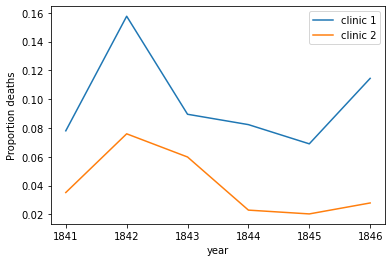

In [43]:
%matplotlib inline
ax = yearly1.plot(x='year', y='proportion_deaths', label='clinic 1')
yearly2.plot(x='year', y='proportion_deaths', label='clinic 2', ax=ax)
ax.set_ylabel('Proportion deaths')

# Task 4: Instructions

In [32]:
monthly= pd.read_csv(r'C:\Users\rahul\Downloads\datasets\datasets\monthly_deaths.csv',parse_dates=["date"])

In [33]:
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [34]:
monthly["proportion_deaths"]= my_df['deaths']/ my_df['births']
monthly[["proportion_deaths"]]

,proportion_deaths
0,0.145669
1,0.075314
2,0.043321
3,0.015686
4,0.007843
...,...
93,0.029032
94,0.013405
95,0.022333
96,0.030848


In [35]:
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


# Task 5: Instructions

Text(0, 0.5, 'proportion death')

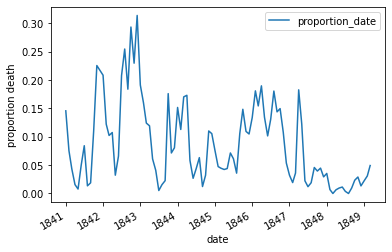

In [36]:
ax = monthly.plot(x='date' , y='proportion_deaths' , label='proportion_date' )
ax.set_ylabel ('proportion death')

# Task 6: Instructions

Text(0, 0.5, 'Proportion deaths')

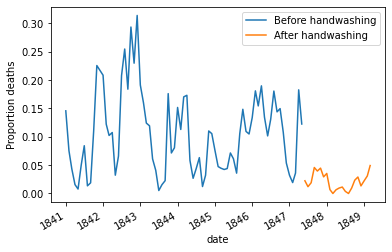

In [44]:
handwashing_start = pd.to_datetime('1847-06-01')
before_washing = monthly[monthly.date < handwashing_start]
after_washing = monthly[monthly.date >= handwashing_start]
ax = before_washing.plot(x='date', y='proportion_deaths', label='Before handwashing')
after_washing.plot(x='date', y='proportion_deaths', label='After handwashing', ax=ax)
ax.set_ylabel('Proportion deaths')

# Task 7: Instructions

In [45]:
before_proportion = before_washing.proportion_deaths
after_proportion = after_washing.proportion_deaths
mean_diff = after_proportion.mean() - before_proportion.mean() 
print(mean_diff)

-0.0839566075118334


# Task 8: Instructions

In [49]:
from numpy import percentile
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

confidence_interval = percentile(boot_mean_diff, [2.5, 97.5])
print(confidence_interval)

[-0.10096492 -0.06696037]


# Task 9: Instructions

In [50]:
doctors_should_wash_their_hands = True